# Clustering: K-Means

+ The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

Pasos:
1. Seleccionar el número de clústers que se quiere identificar. Por ejemplo: $3$ clústers.
2. Seleccionar $3$ puntos aleatoriamente, que serán los clústers iniciales.
3. Medir la distancia entre el primer punto y los $3$ clústers iniciales.
4. Asignar el primer punto al clúster más cercano. Repetir desde el paso $3$ para los demás puntos.
5. Calcular la media de cada clúster. Estas medias serán los nuevos 3 clústers.
6. Repetir lo hecho anteriormente, medir la distancia entre cada punto y los nuevos clústers. Asignar al clúster de menor distancia. El proceso termina cuando los clústers no cambian.


+ Se puede medir la calidad de lo hecho calculando la varianza de cada clúster y sumándola, esto nos deja con la suma de $K$-varianzas, que irán cambiando dependiendo de la $K$ que escojamos. 

+ Una forma óptima para decidir los valores de $K$, (el número de clústers), es intentar con distintos valores de clústers. Después, se compara la variación total de $K$ por cada iteración. Es decir, se comparará la varianza de una agrupación con la varianza total de dos agrupaciones, y así sucesivamente. Cada vez que se añande un nuevo clúster la varianza total es menor que la anterior. Cuando hay un sólo punto por cada clúster la varianza es $0$. Por otro lado, cuando hay un único clúster la varianza será la máxima (las diferencias entre los puntos y el centroide calculado se elevan todas al cuadrado, para después sumarse).

In [1]:
# Se importan las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

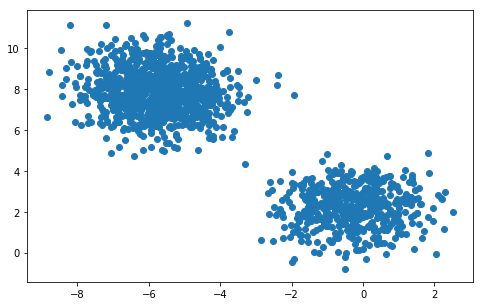

In [2]:
# Generar datos para el clustering 
semilla=5
X,Y=make_blobs(n_samples=1500,random_state=semilla)
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1])
plt.show()

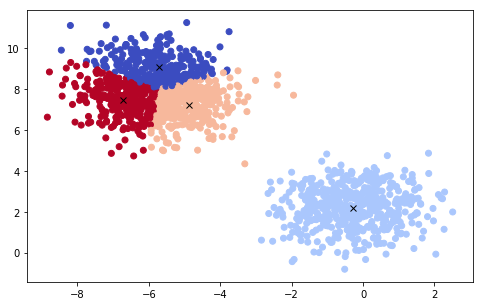

In [3]:
# Aplicar K-Means
# Este algoritmo realiza clústers de forma arbitraria, para este caso se eligen 4 clústers
# Se elige al modelo junto con sus clústers
model=KMeans(n_clusters=4,random_state=semilla,init="k-means++")
# Se entrena al modelo
model=model.fit(X)
grupos=model.predict(X)

# Centroides
centroides=model.cluster_centers_

# Visualización
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],c=grupos,cmap="coolwarm")
plt.plot(centroides[:,0],centroides[:,1],"x",c="k")
plt.show()

+ ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
+ ‘random’: choose k observations (rows) at random from data for the initial centroids.

## Criterios de selección

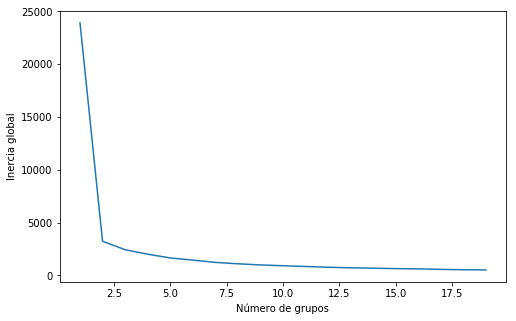

In [4]:
# Criterio del codo
# Matriz para guardar las inercias de 19 iteraciones
inercias=[]

# Se crean desde 1 hasta 19 clústers
for k in np.arange(1,20):
    model=KMeans(n_clusters=k,random_state=semilla,init="random")  
    # Se entrena al modelo
    model=model.fit(X)
    # Se calcula la inercia (varianza para el K-Mean) 
    inercias.append(model.inertia_)

# Visualización    
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,20),inercias)
plt.xlabel("Número de grupos")
plt.ylabel("Inercia global")
plt.show()

In [5]:
np.array(inercias)

array([23921.76101102,  3233.411036  ,  2426.12982134,  2004.24246523,
        1648.30301235,  1444.00383274,  1227.00041889,  1094.04992978,
         984.88425782,   908.40638852,   838.76652009,   765.95979127,
         711.62505464,   677.35116667,   636.19080447,   610.7219789 ,
         563.41870667,   529.93279529,   509.92267332])

El criterio del codo nos muestra que en los $2$ clústers está el punto de inflexión. 

A partir de $K=2$ la varianza disminuye cada vez a un menor ritmo.

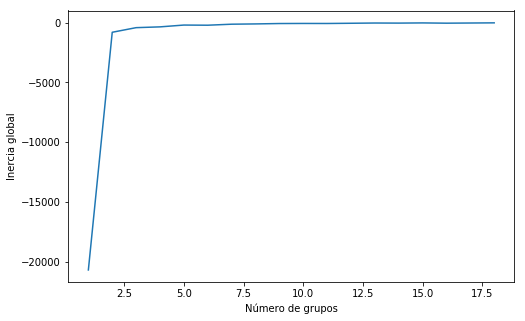

In [6]:
# Criterio del gradiente
inercias_diff=np.diff(inercias)   # np.diff() toma la diferencia hacia adelante, en este caso es el cambio cuando se pasa de un K=n a un K=n+1
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,20-1),inercias_diff)
plt.xlabel("Número de grupos")
plt.ylabel("Inercia global")
plt.show()

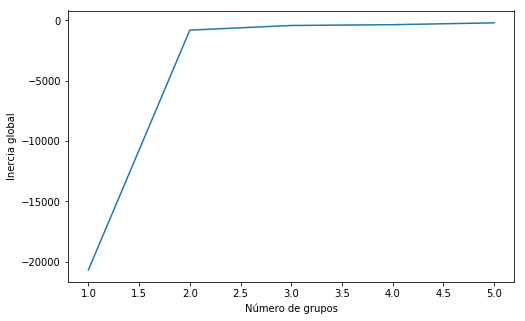

In [7]:
# Criterio del gradiente
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,6),inercias_diff[0:5]) # np.arange() no cuenta el límite superior
plt.xlabel("Número de grupos")
plt.ylabel("Inercia global")
plt.show()

Para el criterio del gradiente se obtiene la derivada de las inercias. Es lógico que para un único clúster, $K=1$, la diferencia de la inercia sea muy alta. Para este caso, el máximo global se encuentra en $K=2$, esto quiere decir que la disminución en la inercia es la mayor cuando se pasa de $K=1$ a $K=2$. Después, sí sigue disminuyendo pero a un ritmo cada vez menor, por ello que $K=2$ sea un punto de inflexión, y, por lo tanto, el óptimo.

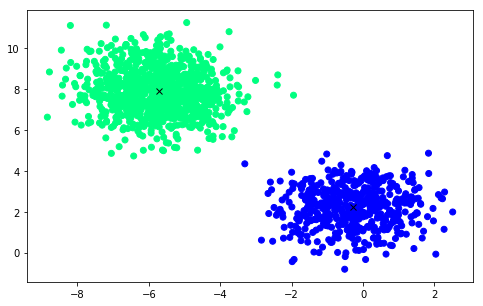

In [8]:
# Aplicar K-Means con el número de centroides óptimo, para este caso 2 centroides
model=KMeans(n_clusters=2,random_state=semilla,init="k-means++")
model=model.fit(X)
grupos=model.predict(X)

centroides=model.cluster_centers_

plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],c=grupos,cmap="winter")
plt.plot(centroides[:,0],centroides[:,1],"x",c="k")
plt.show()